### Program written by Scott Midgley, 2021
 Scope: To train and test GBDT models for band gap energy screening in the configuraional space of MgO-ZnO solid solutions. 
 
 **Note** you will need to set the repo path to tell the code where to look for data.

In [1]:
### USER INPUT REQUIRED ###

# Please paste in the path to the repositiory here an comment/uncomment as needed.
# E.g. rundir = r'C:\Users\<user>\Desktop\repository'

# Windows path
#repodir = r'<windows\path\here>'

#Unix path
#repodir = '<unix/path/here>' 
repodir = r'/home/mts87985/ml-thermo/Machine-Learning-for-Solid-Solutions/'

In [2]:
### USER INPUT REQUIRED ###

# Define percentage of training data to use for training. 
#split = 10
#split = 50
split = 80
#split = 30

In [3]:
# Import modules. 
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import pickle
import time
from sklearn import datasets, ensemble
from sklearn import metrics 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV   
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import os

## Load the data

Note we do not shuffle in this case. The data was shuffled when created and we are keeping it un-shuffled here so that the order is the same as that used in the paper. However, you are free to add a shuffle if you like.

In [4]:
# Import data and shuffle (optional).
eners = pd.read_pickle(repodir + 'repository-data/coulomb_matrix/input_data_cme.pkl')
#eners = eners.sample(frac=1)

In [5]:
# Split data frame into training, validation, and testing data. 
if split == int(10):
    e_train = eners.iloc[1608:2412] #10% of data for training
elif split == int(30):
    e_train = eners.iloc[1608:4021] #30% of data for training
elif split == int(50):
    e_train = eners.iloc[1608:5630] #50% of data for training
elif split == int(80):
    e_train = eners.iloc[1608:] #80% of data for training
else:
    print('Error: please choose a valid train/test split.')
e_val = eners.iloc[804:1608] #10% of data for validation
e_test = eners.iloc[:804] #10% of data for testing model

In [6]:
# Convert Pandas columns to Numpy arrays. Reshaping to obtain array of nested brackets. 
Xtrain = e_train['Coulomb'].to_numpy()
ytrain = e_train['BGE'].to_numpy()
Xtrain = np.stack(Xtrain)
ytrain= np.stack(ytrain) 
Xval = e_val['Coulomb'].to_numpy()
yval = e_val['BGE'].to_numpy()
Xval = np.stack(Xval)
yval= np.stack(yval)
Xtest = e_test['Coulomb'].to_numpy()
ytest = e_test['BGE'].to_numpy()
Xtest = np.stack(Xtest)
ytest = np.stack(ytest)

In [7]:
# Define GBDT hyperparameters. 
params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(Xtrain, ytrain)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=1000)

In [8]:
# Test GBDT model. 
ypred = reg.predict(Xtest)

In [9]:
# Print metrics.
mae = (mean_absolute_error(ytest, ypred))
print('mae = ', mae)

mae =  0.00972865059846362


Text(0, 0.5, 'GBDT')

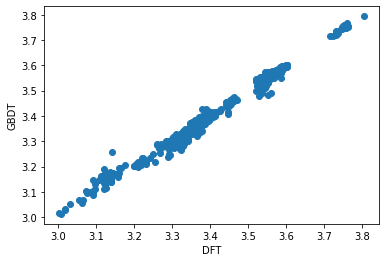

In [10]:
#Plot DFT Band gap energy vs regressor predicted.
plt.scatter(ytest, ypred)# plot the predicted versus the actual gaps
plt.xlabel('DFT')
plt.ylabel('GBDT')